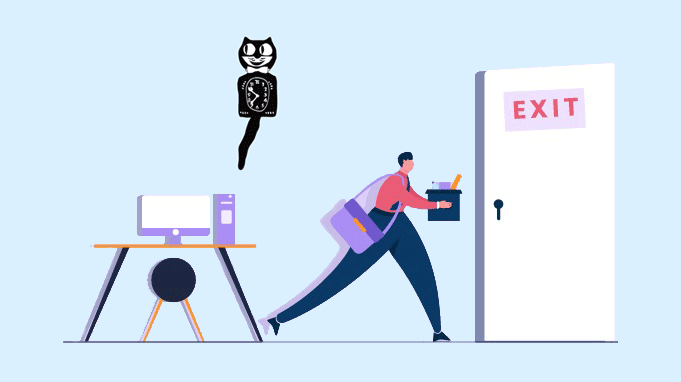

## <center>👥 Employee Attrition Analysis with Logistic Regression</center>

### <center>What factors drive an employee's decision to leave?</center>

## IBM HR Analytics Employee Attrition & Performance

I will be performing exploratory data analysis (EDA), correlation analysis, and logistic regression analysis on a fictional data set created by IBM data scientists.

## 📙 **Data Dictionary**

**Education:**
1. Below College
2. College
3. Bachelor
4. Master
5. Doctor

**Environment Satisfaction:**
1. Low
2. Medium
3. High
4. Very High 

**Job Involvement:**
1. Low
2. Medium
3. High
4. Very High

**Job Satisfaction:** 
1. Low
2. Medium
3. High
4. Very High

**Performance Rating:**
1. Low
2. Good
3. Excellent 
4. Outstanding

**Relationship Satisfaction:**
1. Low
2. Medium
3. High
4. Very High

**Work Life Balance:**
1. Bad
2. Good
3. Better
4. Best

*Note: This dictionary was pulled from the Kaggle dataset. It is incomplete and has limited information. The values of the columns not mentioned here are unknown.*


## 💭 Problem

First, what is Attrition and what determines it?

**Attrition:** It is simply the turnover rate of employees inside an organization.

Employees leave for many reasons:

- Seeking better opportunities;
- Bad management;
- Poor work culture;
- Misalignment with company values;
- Sickness of an employee;
- Excessive working hours;

and more.

With this dataset, we want to know: 
1. What are some significant factors that lead to attrition? 
2. Are there correlations and how significant are they? What about between the independent variables?
3. Can we create train a logistic regression model with the data to predict whether or not an employee will decide to leave the company, and with what accuracy?

From the insights we uncover, we can provide recommendations to HR for better retention and perhaps future talent acquisition.

## 📥 Import Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from scipy.stats import norm

In [2]:
employees = pd.read_csv('hr_attrition.csv')

## 📊 Exploratory Data Analysis

In [3]:
employees.shape

(1470, 35)

In [4]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

This dataset contains data on 35 different attributes across 1,470 employees.

In [5]:
#Check for duplicate data across columns
#Use tranpose to transform dataset to flip columns into rows
employees.T.duplicated()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

There are no redundant columns with duplicate information.

In [6]:
#Check for null values in the dataframe 
employees.isna().sum(axis=0)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values. 

In [7]:
#Look at statistics of numerical data
employees.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Some interesting highlights from the data so far:
- the average age is about 37, with youngest being 18 and oldest being 60 
- the average job satifaction level is 2.73, a little on the higher end of the scale 
- the average relationship satisfaction level is 2.71, also on the higher end of the scale
- the average work life balance rating is 2.76, also on the higher end of the scale
- the average total years at the company is 7, with a range of 0 to as high as 40 years

In [8]:
#Continue looking at the data 
pd.set_option('display.max_columns', None)
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
pd.set_option('display.max_columns', None)
employees.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [10]:
#Look into sample of data
employees.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
398,37,No,Non-Travel,1063,Research & Development,25,5,Medical,1,529,2,Female,72,3,2,Research Scientist,3,Married,4449,23866,3,Y,Yes,15,3,1,80,2,15,2,3,13,11,10,7
1063,29,No,Travel_Rarely,1246,Sales,19,3,Life Sciences,1,1497,3,Male,77,2,2,Sales Executive,3,Divorced,8620,23757,1,Y,No,14,3,3,80,2,10,3,3,10,7,0,4
511,36,No,Travel_Rarely,913,Research & Development,9,2,Medical,1,699,2,Male,48,2,2,Manufacturing Director,2,Divorced,8847,13934,2,Y,Yes,11,3,3,80,1,13,2,3,3,2,0,2
892,19,Yes,Non-Travel,504,Research & Development,10,3,Medical,1,1248,1,Female,96,2,1,Research Scientist,2,Single,1859,6148,1,Y,Yes,25,4,2,80,0,1,2,4,1,1,0,0
74,36,No,Travel_Rarely,132,Research & Development,6,3,Life Sciences,1,97,2,Female,55,4,1,Laboratory Technician,4,Married,3038,22002,3,Y,No,12,3,2,80,0,5,3,3,1,0,0,0
877,46,No,Travel_Rarely,150,Research & Development,2,4,Technical Degree,1,1228,4,Male,60,3,2,Manufacturing Director,4,Divorced,7379,17433,2,Y,No,11,3,3,80,1,12,3,2,6,3,1,4
622,32,No,Travel_Rarely,117,Sales,13,4,Life Sciences,1,859,2,Male,73,3,2,Sales Executive,4,Divorced,4403,9250,2,Y,No,11,3,3,80,1,8,3,2,5,2,0,3
1006,49,Yes,Travel_Frequently,1475,Research & Development,28,2,Life Sciences,1,1420,1,Male,97,2,2,Laboratory Technician,1,Single,4284,22710,3,Y,No,20,4,1,80,0,20,2,3,4,3,1,3
247,34,No,Travel_Rarely,470,Research & Development,2,4,Life Sciences,1,339,4,Male,84,2,2,Manufacturing Director,1,Married,5957,23687,6,Y,No,13,3,2,80,1,13,3,3,11,9,5,9
778,46,No,Travel_Rarely,1003,Research & Development,8,4,Life Sciences,1,1080,4,Female,74,2,2,Research Scientist,1,Divorced,4615,21029,8,Y,Yes,23,4,1,80,3,19,2,3,16,13,1,7


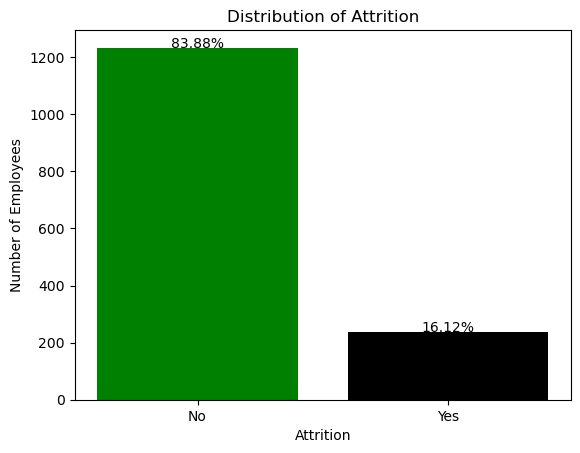

In [11]:
# Distribution of attrition
total_employees = len(employees)
attrition_counts = employees['Attrition'].value_counts()

colors = []
for i in range(len(employees['Attrition'].value_counts())):
    if employees['Attrition'].value_counts().index[i] == 'No':
        colors.append('green')
    else:
        colors.append('black')

#Plot
plt.figure()
plt.bar(employees['Attrition'].value_counts().index,
        employees['Attrition'].value_counts().values,
        color=colors)
plt.xlabel ('Attrition')
plt.ylabel ('Number of Employees')
plt.title ('Distribution of Attrition')

# Add annotations
for i, v in enumerate(attrition_counts.values):
    percent = (v / total_employees) * 100
    plt.text(i, v, str(round(percent, 2)) + '%', ha='center')
    
plt.show()

16% of total employees have left while 84% are still with the company.

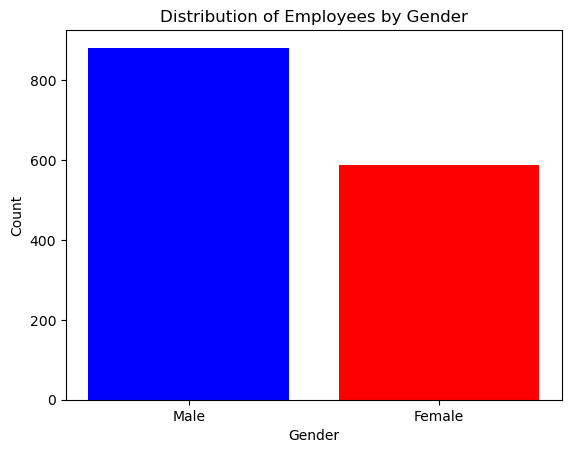

In [12]:
#Distribution of gender
colors = []
for i in range(len(employees['Gender'].value_counts())):
    if employees['Gender'].value_counts().index[i] == 'Male':
        colors.append('b')
    else:
        colors.append('r')

#Plot
plt.bar(employees['Gender'].value_counts().index,
        employees['Gender'].value_counts().values, color=colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Employees by Gender')
plt.show()

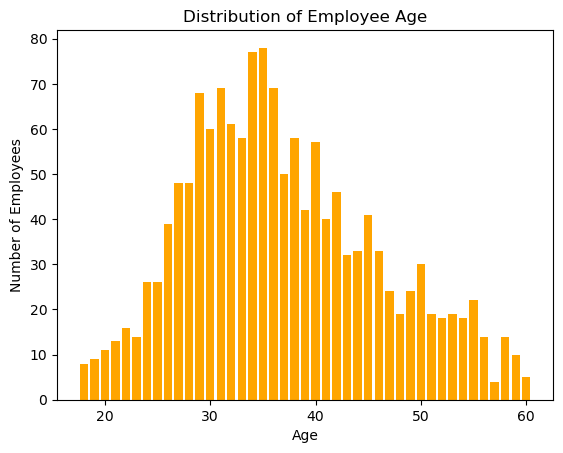

In [13]:
#Distribution of employee age
plt.figure()
plt.bar(employees['Age'].value_counts().index, 
        employees['Age'].value_counts().values, color='orange')
plt.xlabel ('Age')
plt.ylabel ("Number of Employees")
plt.title ('Distribution of Employee Age')
plt.show()

In [114]:
#Look at attrition by gender
fig = px.histogram(employees, x="Attrition", color="Gender",histfunc="sum", text_auto=True,width=600,height=600)

# Add y-axis label
fig.update_layout(title ="Attrition by Gender",yaxis_title="Count")

fig.show()

In [111]:
#Look at attrition by age
fig = px.histogram(employees, x="Age", color="Attrition",histfunc="sum", text_auto=True,width=600,height=600)

# Add y-axis label
fig.update_layout(title ="Attrition by Age",yaxis_title="Count")

fig.show()

In [113]:
#Look at attrition by age
fig = px.histogram(employees, x="BusinessTravel", color="Attrition",histfunc="sum", text_auto=True,width=600,height=600)

# Add y-axis label
fig.update_layout(title ="Attrition by Business Travel Frequency",yaxis_title="Count")

fig.show()

In [17]:
#Look at attrition by age
fig = px.histogram(employees, x="Department", color="Attrition",histfunc="sum", text_auto=True,width=600,height=600)

# Add y-axis label
fig.update_layout(title ="Attrition by Department",yaxis_title="Count")

fig.show()

We'll start exploring the relationships between each independent variable and the dependent variable of attrition by plotting.

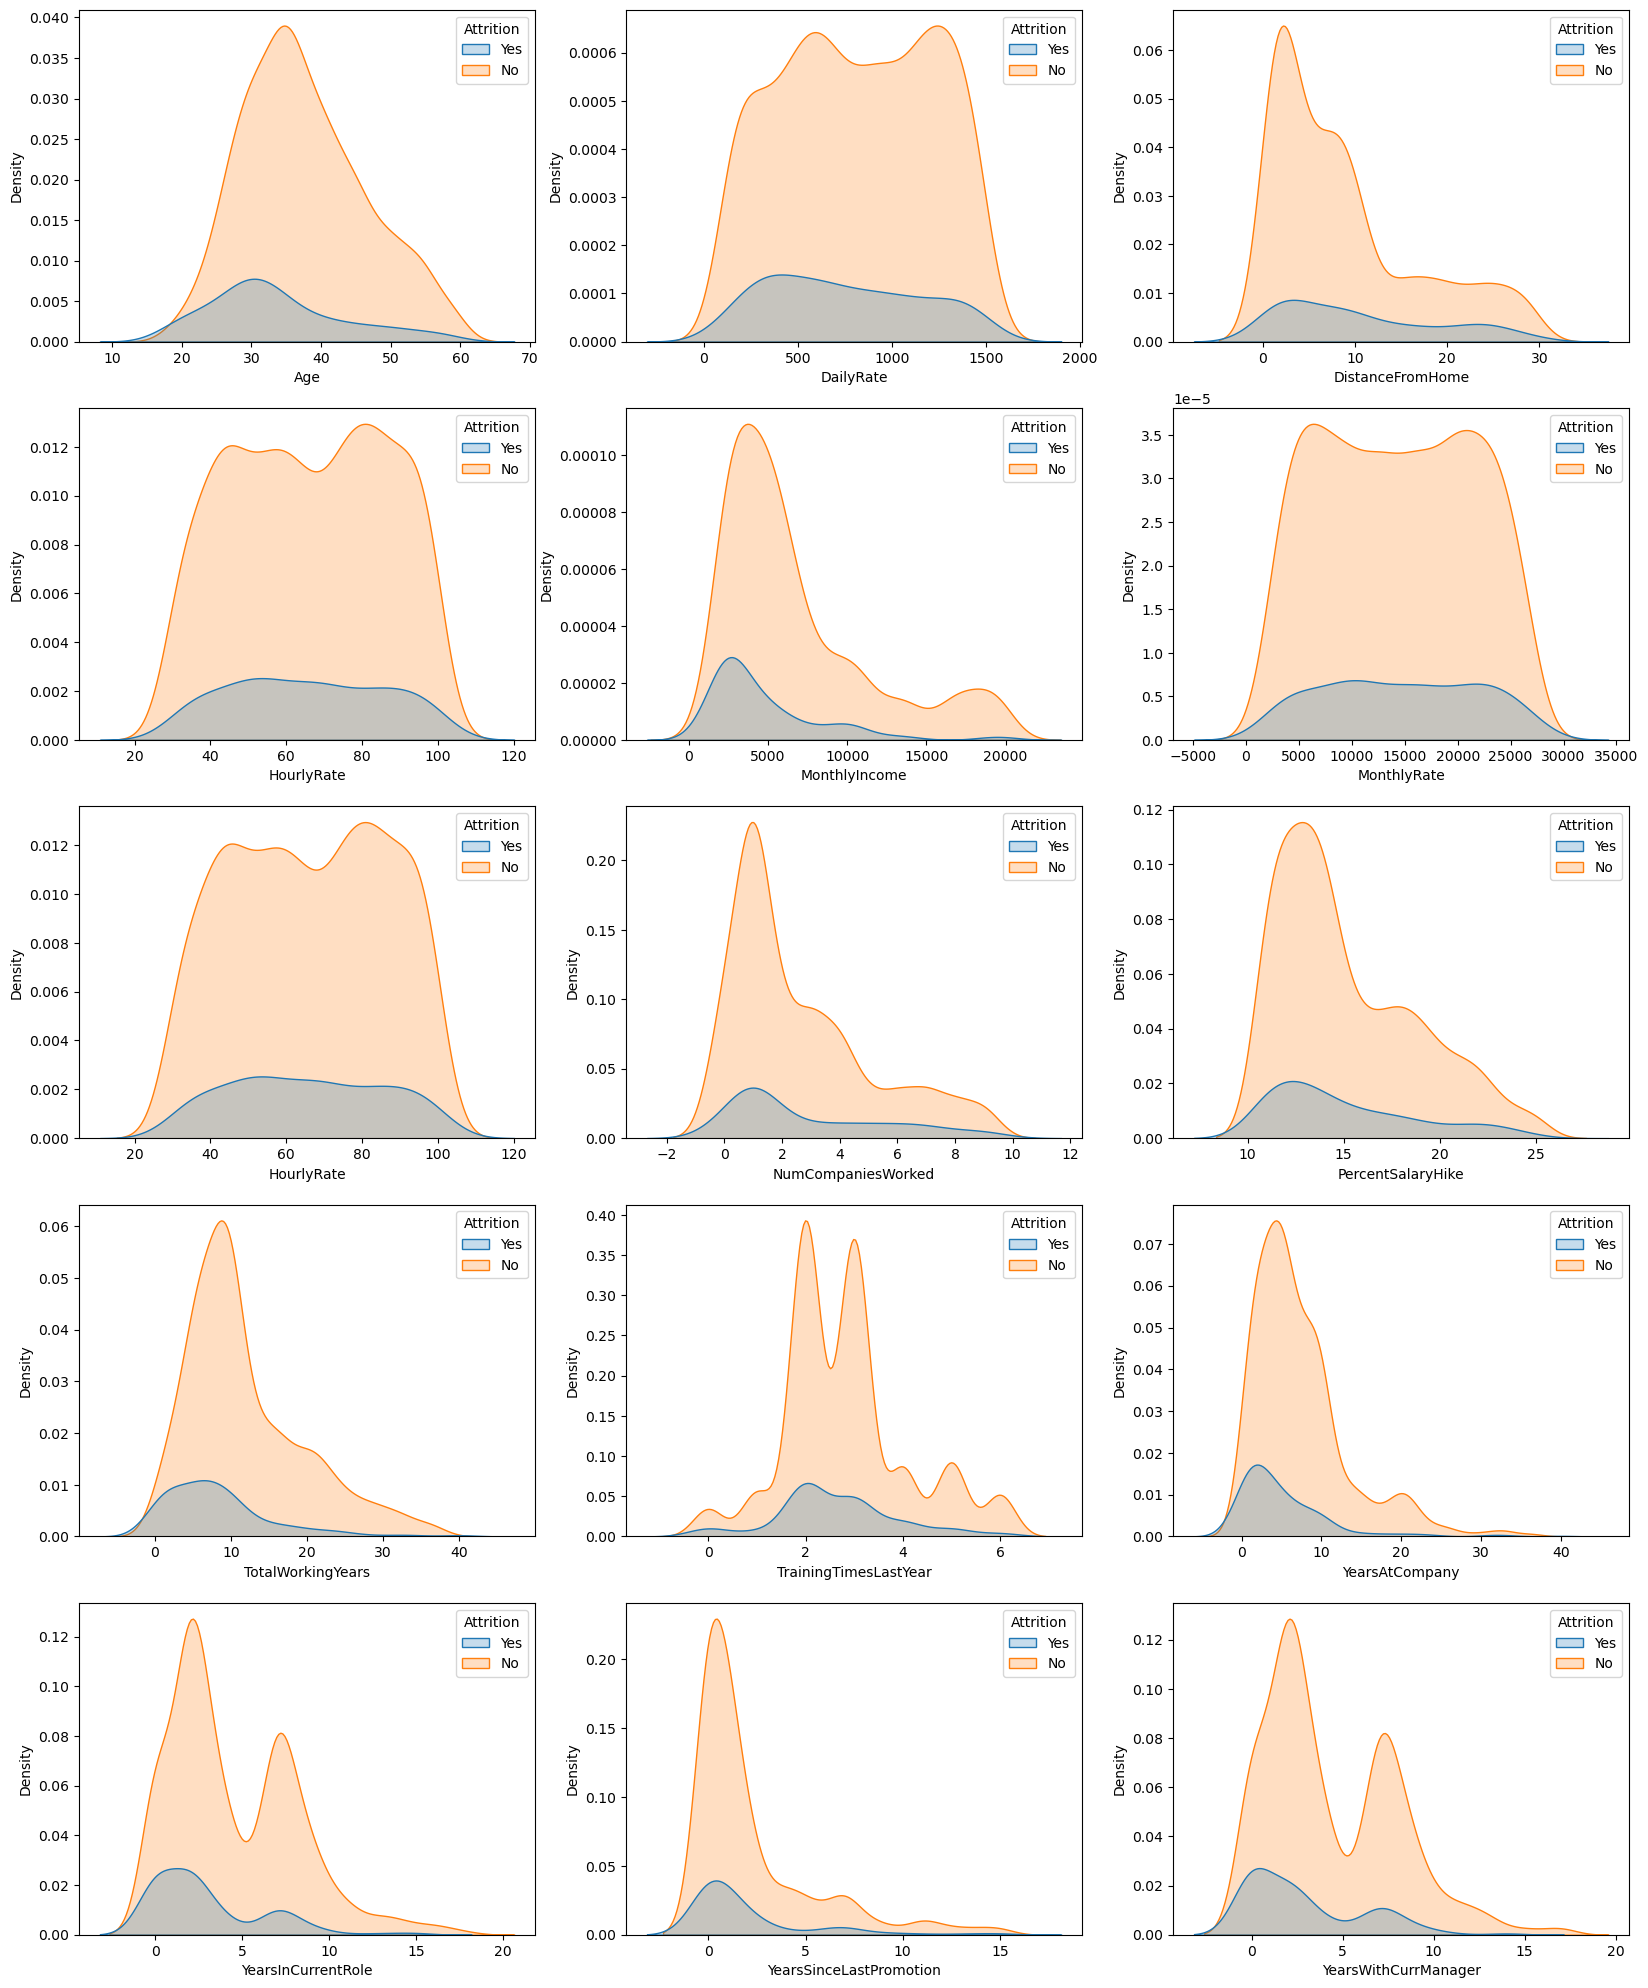

In [18]:
#set columns of numerical independent variables that would affect the dependent variable of Attrition
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
            'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
            'YearsWithCurrManager']

fig, ax = plt.subplots(5, 3, figsize = (20, 5*5))
for i, col in enumerate(num_cols):
    sns.kdeplot(data=employees, x=col, fill = True, ax = ax[i // 3][i % 3], hue=employees['Attrition'])

💡 A few highlights we can infer from looking at these graphs:

- looking at age, attrition appears to be highest when employees are about 30 years old
- attrition appears to be highest at the lower end of both monthly income and percent salary hike, conversely attrition decreases as monthly income and percent salary hike increases
- when it comes to years the employee has worked at the company, attrition was highest when the employee was newer with the company and has worked for less than 2 years


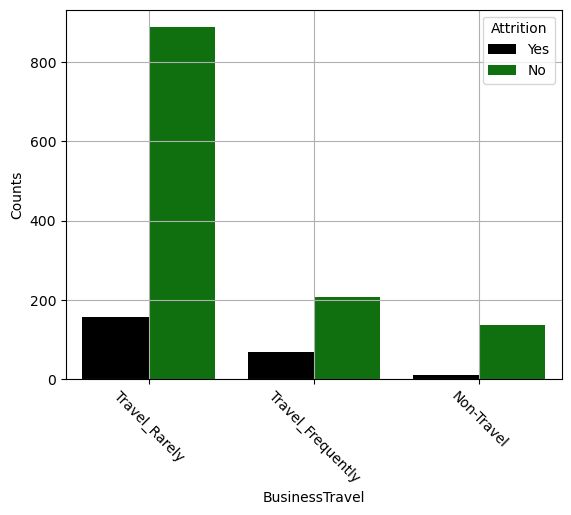

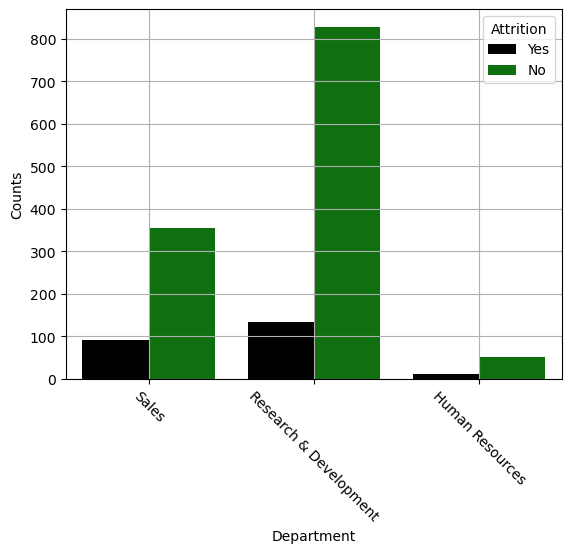

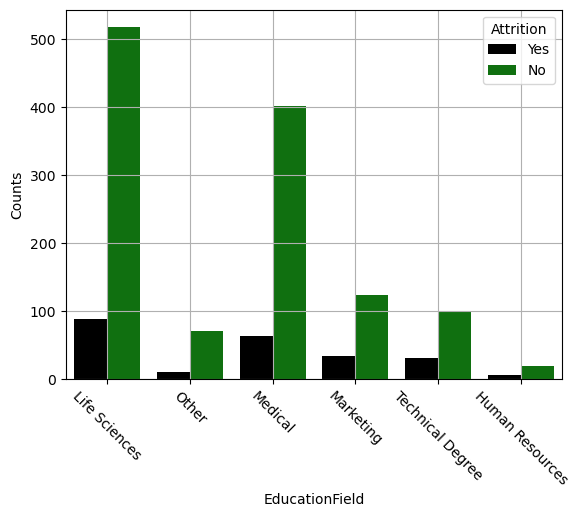

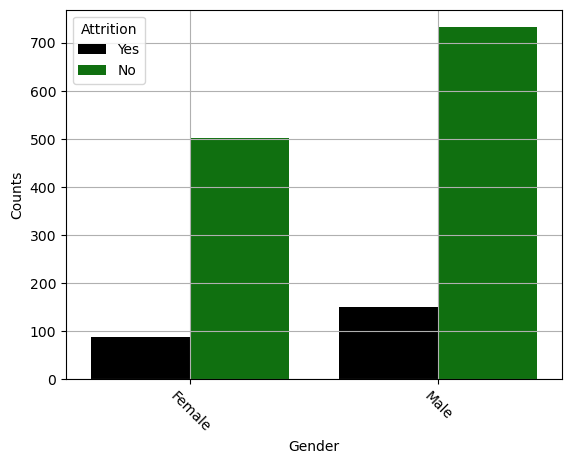

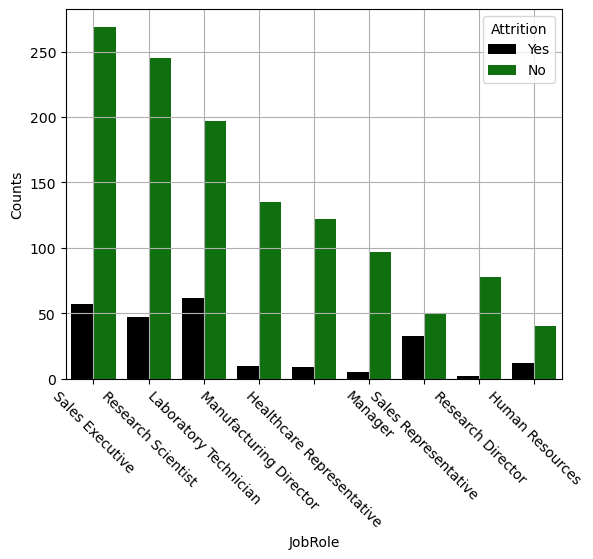

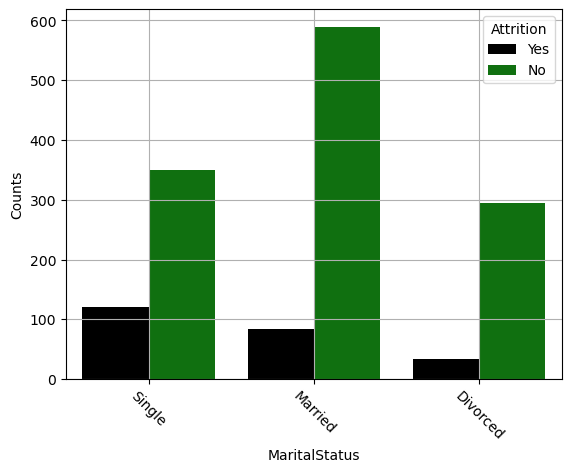

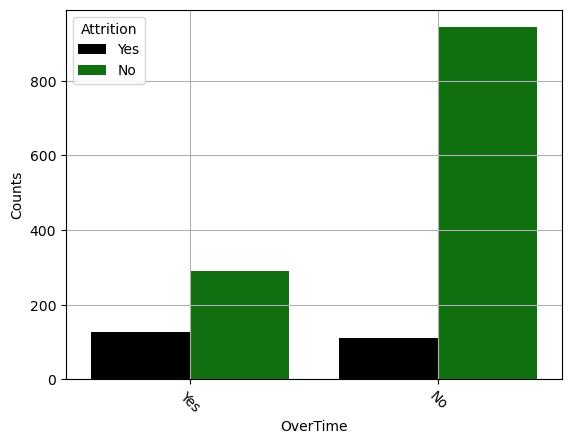

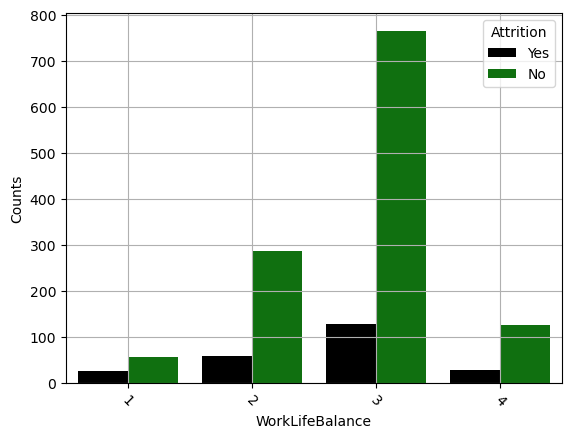

In [19]:
#set columns of categorical independent variables that would affect the dependent variable of Attrition
cat_cols = ['BusinessTravel','Department', 'EducationField', 'Gender', 
            'JobRole', 'MaritalStatus', 'OverTime','WorkLifeBalance']

import matplotlib.cm as cm

for col in cat_cols:
    plt.figure()
    counts = employees[col].value_counts()
    sns.countplot(x=col, hue='Attrition', data=employees, palette={"Yes": "black", "No": "green"})
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.grid()
    plt.xticks(rotation=-45)
plt.show()


## 📈 Logistic Regression Analysis

Since the output we want to predict, attrition, is categorical (yes or no). We will use logistic regression. 

Our hypothesis going in:

<center> $H_0$: The independent variables do not influence attrition. $\;\; vs \;\;$  $H_1$: The independent variables do influence attrition. </center>

In [20]:
#Reminder of what the distribution of attrition looks like
employees['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [21]:
employees['Attrition'].value_counts()/len(employees)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [22]:
#First, convert the Attrition column to contain dummy variables
#Data of WNV Present is converted into binary data using pd.get_dummies()
df_one = pd.get_dummies(employees['Attrition'])

#Binary data is concatenated into dataframe
df_two = pd.concat((df_one, employees), axis=1)

df_two.head()

,No,Yes,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1,0,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,0,1,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1,0,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1,0,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [23]:
#Drop the negative column so positive column is left
df_two = df_two.drop(['No'], axis=1)
df_two.sample(5)

#Drop the Attrition column with the categorical data
df_two = df_two.drop(['Attrition'], axis=1)

# Rename the Yes column as the new Attrition column
employees_clean = df_two.rename(columns={'Yes' : 'Attrition'})
employees_clean.sample(10)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
709,1,31,Non-Travel,335,Research & Development,9,2,Medical,1,991,3,Male,46,2,1,Research Scientist,1,Single,2321,10322,0,Y,Yes,22,4,1,80,0,4,0,3,3,2,1,2
1395,1,31,Travel_Frequently,754,Sales,26,4,Marketing,1,1967,1,Male,63,3,2,Sales Executive,4,Married,5617,21075,1,Y,Yes,11,3,3,80,0,10,4,3,10,7,0,8
1166,0,48,Travel_Frequently,365,Research & Development,4,5,Medical,1,1644,3,Male,89,2,4,Manager,4,Married,15202,5602,2,Y,No,25,4,2,80,1,23,3,3,2,2,2,2
648,0,37,Travel_Frequently,1231,Sales,21,2,Medical,1,900,3,Female,54,3,1,Sales Representative,4,Married,2973,21222,5,Y,No,15,3,2,80,1,10,3,3,5,4,0,0
636,1,35,Travel_Frequently,130,Research & Development,25,4,Life Sciences,1,881,4,Female,96,3,1,Research Scientist,2,Divorced,2022,16612,1,Y,Yes,19,3,1,80,1,10,3,2,10,2,7,8
539,0,50,Travel_Rarely,316,Sales,8,4,Marketing,1,738,4,Male,54,3,1,Sales Representative,2,Married,3875,9983,7,Y,No,15,3,4,80,1,4,2,3,2,2,2,2
491,0,43,Travel_Frequently,1001,Research & Development,9,5,Medical,1,663,4,Male,72,3,2,Laboratory Technician,3,Divorced,5679,19627,3,Y,Yes,13,3,2,80,1,10,3,3,8,7,4,7
834,0,34,Travel_Rarely,1400,Sales,9,1,Life Sciences,1,1163,2,Female,70,3,2,Sales Executive,3,Married,5714,5829,1,Y,No,20,4,1,80,0,6,3,2,6,5,1,3
1425,0,33,Travel_Rarely,501,Research & Development,15,2,Medical,1,2009,2,Female,95,3,2,Healthcare Representative,4,Married,4878,21653,0,Y,Yes,13,3,1,80,1,10,6,3,9,7,8,1
562,1,33,Travel_Rarely,527,Research & Development,1,4,Other,1,780,4,Male,63,3,1,Research Scientist,4,Single,2686,5207,1,Y,Yes,13,3,3,80,0,10,2,2,10,9,7,8


Let's look at independent categorical variables of: Business Travel, Department, Education (level), Education Field, Environment Satisfaction, Gender, Job Involvement, Job Level, Job Role, Job Satisfaction, Marital Status, OverTime, Performance Rating, Relationship Satisfaction, Stock Option Level, and Work Life Balance and their correlations to the dependent variable of Attrition.

In [24]:
employees_clean = employees_clean[['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction',
                                 'Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus',
                                 'OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
                                 'WorkLifeBalance']]
employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,Yes,3,1,0,1
1,0,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,No,4,4,1,3
2,1,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,Single,Yes,3,2,0,3
3,0,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,Yes,3,3,0,3
4,0,Travel_Rarely,Research & Development,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,No,3,4,1,3


In [25]:
#Business Travel
employees_clean['BusinessTravel'].value_counts()/employees_clean.shape[0]

Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64

In [26]:
#Set Business Travel dummy variables
employees_clean['BusinessTravel'] = employees_clean['BusinessTravel'].map(
    {'Travel_Rarely':0, 'Travel_Frequently':1, 'Non_Travel':2})

In [27]:
employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0.0,Sales,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,Yes,3,1,0,1
1,0,1.0,Research & Development,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,No,4,4,1,3
2,1,0.0,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,Single,Yes,3,2,0,3
3,0,1.0,Research & Development,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,Yes,3,3,0,3
4,0,0.0,Research & Development,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,No,3,4,1,3


In [28]:
employees_clean.dtypes

Attrition                     uint8
BusinessTravel              float64
Department                   object
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
OverTime                     object
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
WorkLifeBalance               int64
dtype: object

In [29]:
employees_clean['BusinessTravel'].isna().sum()

150

In [30]:
employees_clean.dropna(subset=['BusinessTravel'], inplace=True)

In [31]:
employees_clean['BusinessTravel'] = employees_clean['BusinessTravel'].astype(int)

In [32]:
#Department
employees_clean['Department'].value_counts()/employees_clean.shape[0]

Research & Development    0.654545
Sales                     0.302273
Human Resources           0.043182
Name: Department, dtype: float64

In [33]:
#Set Department dummy variables
employees_clean['Department'] = employees_clean['Department'].map(
    {'Research & Development':0, 'Sales':1, 'Human Resources':2})

employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,Yes,3,1,0,1
1,0,1,0,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,No,4,4,1,3
2,1,0,0,2,Other,4,Male,2,1,Laboratory Technician,3,Single,Yes,3,2,0,3
3,0,1,0,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,Yes,3,3,0,3
4,0,0,0,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,No,3,4,1,3


In [34]:
#Education
employees_clean['Education'].value_counts()/employees_clean.shape[0]

3    0.396212
4    0.267424
2    0.186364
1    0.117424
5    0.032576
Name: Education, dtype: float64

In [35]:
#Set Education dummy variables
employees_clean['Education'] = employees_clean['Education'].map(
    {3:0, 4:1, 2:2, 1:3, 5:4})

employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,Yes,3,1,0,1
1,0,1,0,3,Life Sciences,3,Male,2,2,Research Scientist,2,Married,No,4,4,1,3
2,1,0,0,2,Other,4,Male,2,1,Laboratory Technician,3,Single,Yes,3,2,0,3
3,0,1,0,1,Life Sciences,4,Female,3,1,Research Scientist,3,Married,Yes,3,3,0,3
4,0,0,0,3,Medical,1,Male,3,1,Laboratory Technician,2,Married,No,3,4,1,3


In [36]:
#Education Field
employees_clean['EducationField'].value_counts()/employees_clean.shape[0]

Life Sciences       0.411364
Medical             0.313636
Marketing           0.111364
Technical Degree    0.089394
Other               0.056818
Human Resources     0.017424
Name: EducationField, dtype: float64

In [37]:
#Set Education Field dummy variables
employees_clean['EducationField'] = employees_clean['EducationField'].map(
    {'Life Sciences':0, 'Medical':1, 'Marketing':2, 'Technical Degree':3, 'Other':4, 'Human Resources':5})

employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0,1,2,0,2,Female,3,2,Sales Executive,4,Single,Yes,3,1,0,1
1,0,1,0,3,0,3,Male,2,2,Research Scientist,2,Married,No,4,4,1,3
2,1,0,0,2,4,4,Male,2,1,Laboratory Technician,3,Single,Yes,3,2,0,3
3,0,1,0,1,0,4,Female,3,1,Research Scientist,3,Married,Yes,3,3,0,3
4,0,0,0,3,1,1,Male,3,1,Laboratory Technician,2,Married,No,3,4,1,3


In [38]:
#Environmnt Satisfaction
employees_clean['EnvironmentSatisfaction'].value_counts()/employees_clean.shape[0]

4    0.305303
3    0.302273
2    0.200000
1    0.192424
Name: EnvironmentSatisfaction, dtype: float64

In [39]:
#Set Environment Satisfaction dummy variables
employees_clean['EnvironmentSatisfaction'] = employees_clean['EnvironmentSatisfaction'].map(
    {4:0,3:1,2:2,1:3})

employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0,1,2,0,2,Female,3,2,Sales Executive,4,Single,Yes,3,1,0,1
1,0,1,0,3,0,1,Male,2,2,Research Scientist,2,Married,No,4,4,1,3
2,1,0,0,2,4,0,Male,2,1,Laboratory Technician,3,Single,Yes,3,2,0,3
3,0,1,0,1,0,0,Female,3,1,Research Scientist,3,Married,Yes,3,3,0,3
4,0,0,0,3,1,3,Male,3,1,Laboratory Technician,2,Married,No,3,4,1,3


In [40]:
#Gender Field
employees_clean['Gender'].value_counts()/employees_clean.shape[0]

Male      0.591667
Female    0.408333
Name: Gender, dtype: float64

In [41]:
#Set Gender Field dummy variables
employees_clean['Gender'] = employees_clean['Gender'].map(
    {'Male':0, 'Female':1})

employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0,1,2,0,2,1,3,2,Sales Executive,4,Single,Yes,3,1,0,1
1,0,1,0,3,0,1,0,2,2,Research Scientist,2,Married,No,4,4,1,3
2,1,0,0,2,4,0,0,2,1,Laboratory Technician,3,Single,Yes,3,2,0,3
3,0,1,0,1,0,0,1,3,1,Research Scientist,3,Married,Yes,3,3,0,3
4,0,0,0,3,1,3,0,3,1,Laboratory Technician,2,Married,No,3,4,1,3


In [42]:
#Job Involvement Field
employees_clean['JobInvolvement'].value_counts()/employees_clean.shape[0]

3    0.593939
2    0.255303
4    0.099242
1    0.051515
Name: JobInvolvement, dtype: float64

In [43]:
#Set Job Involvement dummy variables
employees_clean['JobInvolvement'] = employees_clean['JobInvolvement'].map(
    {3:0,2:1,4:2,1:3})

employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0,1,2,0,2,1,0,2,Sales Executive,4,Single,Yes,3,1,0,1
1,0,1,0,3,0,1,0,1,2,Research Scientist,2,Married,No,4,4,1,3
2,1,0,0,2,4,0,0,1,1,Laboratory Technician,3,Single,Yes,3,2,0,3
3,0,1,0,1,0,0,1,0,1,Research Scientist,3,Married,Yes,3,3,0,3
4,0,0,0,3,1,3,0,0,1,Laboratory Technician,2,Married,No,3,4,1,3


In [44]:
#Job Level Field
employees_clean['JobLevel'].value_counts()/employees_clean.shape[0]

1    0.375000
2    0.353788
3    0.150000
4    0.071970
5    0.049242
Name: JobLevel, dtype: float64

In [45]:
#Set Job Level dummy variables
employees_clean['JobLevel'] = employees_clean['JobLevel'].map(
    {1:0,2:1,3:2,4:3,5:4})

employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0,1,2,0,2,1,0,1,Sales Executive,4,Single,Yes,3,1,0,1
1,0,1,0,3,0,1,0,1,1,Research Scientist,2,Married,No,4,4,1,3
2,1,0,0,2,4,0,0,1,0,Laboratory Technician,3,Single,Yes,3,2,0,3
3,0,1,0,1,0,0,1,0,0,Research Scientist,3,Married,Yes,3,3,0,3
4,0,0,0,3,1,3,0,0,0,Laboratory Technician,2,Married,No,3,4,1,3


In [46]:
#Job Role Field
employees_clean['JobRole'].value_counts()/employees_clean.shape[0]

Sales Executive              0.217424
Research Scientist           0.200000
Laboratory Technician        0.175000
Manufacturing Director       0.100000
Healthcare Representative    0.087879
Manager                      0.068182
Sales Representative         0.059091
Research Director            0.056061
Human Resources              0.036364
Name: JobRole, dtype: float64

In [47]:
#Set Job Role dummy variables
employees_clean['JobRole'] = employees_clean['JobRole'].map(
    {'Sales Executive':0, 'Research Scientist':1, 'Laboratory Technician': 2, 'Manufacturing Director':3,
    'Healthcare Representative':4, 'Manager':5, 'Sales Representative':6, 'Research Director':7,
    'Human Resources':8})

employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0,1,2,0,2,1,0,1,0,4,Single,Yes,3,1,0,1
1,0,1,0,3,0,1,0,1,1,1,2,Married,No,4,4,1,3
2,1,0,0,2,4,0,0,1,0,2,3,Single,Yes,3,2,0,3
3,0,1,0,1,0,0,1,0,0,1,3,Married,Yes,3,3,0,3
4,0,0,0,3,1,3,0,0,0,2,2,Married,No,3,4,1,3


In [48]:
#Job Satisfaction Field
employees_clean['JobSatisfaction'].value_counts()/employees_clean.shape[0]

4    0.314394
3    0.293939
1    0.201515
2    0.190152
Name: JobSatisfaction, dtype: float64

In [49]:
#Set Job Satisfaction dummy variables
employees_clean['JobSatisfaction'] = employees_clean['JobSatisfaction'].map(
    {4:0,3:1,1:2,2:3})

employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0,1,2,0,2,1,0,1,0,0,Single,Yes,3,1,0,1
1,0,1,0,3,0,1,0,1,1,1,3,Married,No,4,4,1,3
2,1,0,0,2,4,0,0,1,0,2,1,Single,Yes,3,2,0,3
3,0,1,0,1,0,0,1,0,0,1,1,Married,Yes,3,3,0,3
4,0,0,0,3,1,3,0,0,0,2,3,Married,No,3,4,1,3


In [50]:
#Marital Status Field
employees_clean['MaritalStatus'].value_counts()/employees_clean.shape[0]

Married     0.465152
Single      0.320455
Divorced    0.214394
Name: MaritalStatus, dtype: float64

In [51]:
#Set Marital Status dummy variables
employees_clean['MaritalStatus'] = employees_clean['MaritalStatus'].map(
    {'Married':0, 'Single':1, 'Divorced':2})

employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0,1,2,0,2,1,0,1,0,0,1,Yes,3,1,0,1
1,0,1,0,3,0,1,0,1,1,1,3,0,No,4,4,1,3
2,1,0,0,2,4,0,0,1,0,2,1,1,Yes,3,2,0,3
3,0,1,0,1,0,0,1,0,0,1,1,0,Yes,3,3,0,3
4,0,0,0,3,1,3,0,0,0,2,3,0,No,3,4,1,3


In [52]:
#OverTime Field
employees_clean['OverTime'].value_counts()/employees_clean.shape[0]

No     0.711364
Yes    0.288636
Name: OverTime, dtype: float64

In [53]:
#Set OverTime dummy variables
employees_clean['OverTime'] = employees_clean['OverTime'].map(
    {'No':0, 'Yes':1})

employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0,1,2,0,2,1,0,1,0,0,1,1,3,1,0,1
1,0,1,0,3,0,1,0,1,1,1,3,0,0,4,4,1,3
2,1,0,0,2,4,0,0,1,0,2,1,1,1,3,2,0,3
3,0,1,0,1,0,0,1,0,0,1,1,0,1,3,3,0,3
4,0,0,0,3,1,3,0,0,0,2,3,0,0,3,4,1,3


In [54]:
#Performance Rating Field
employees_clean['PerformanceRating'].value_counts()/employees_clean.shape[0]

3    0.848485
4    0.151515
Name: PerformanceRating, dtype: float64

In [55]:
#Set Performance Rating dummy variables
employees_clean['PerformanceRating'] = employees_clean['PerformanceRating'].map(
    {3:0, 4:1})

employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0,1,2,0,2,1,0,1,0,0,1,1,0,1,0,1
1,0,1,0,3,0,1,0,1,1,1,3,0,0,1,4,1,3
2,1,0,0,2,4,0,0,1,0,2,1,1,1,0,2,0,3
3,0,1,0,1,0,0,1,0,0,1,1,0,1,0,3,0,3
4,0,0,0,3,1,3,0,0,0,2,3,0,0,0,4,1,3


In [56]:
#Relationship Satisfaction Field
employees_clean['RelationshipSatisfaction'].value_counts()/employees_clean.shape[0]

3    0.315152
4    0.289394
2    0.206061
1    0.189394
Name: RelationshipSatisfaction, dtype: float64

In [57]:
#Set RelationshipSatisfaction dummy variables
employees_clean['RelationshipSatisfaction'] = employees_clean['RelationshipSatisfaction'].map(
    {3:0, 4:1, 2:2, 1:3})

employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0,1,2,0,2,1,0,1,0,0,1,1,0,3,0,1
1,0,1,0,3,0,1,0,1,1,1,3,0,0,1,1,1,3
2,1,0,0,2,4,0,0,1,0,2,1,1,1,0,2,0,3
3,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,3
4,0,0,0,3,1,3,0,0,0,2,3,0,0,0,1,1,3


In [58]:
#Stock Option Level Field
employees_clean['StockOptionLevel'].value_counts()/employees_clean.shape[0]

0    0.432576
1    0.404545
2    0.107576
3    0.055303
Name: StockOptionLevel, dtype: float64

In [59]:
#Set Stock Option Level dummy variables
employees_clean['StockOptionLevel'] = employees_clean['StockOptionLevel'].map(
    {0:0, 1:1, 2:2, 3:3})

employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0,1,2,0,2,1,0,1,0,0,1,1,0,3,0,1
1,0,1,0,3,0,1,0,1,1,1,3,0,0,1,1,1,3
2,1,0,0,2,4,0,0,1,0,2,1,1,1,0,2,0,3
3,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,3
4,0,0,0,3,1,3,0,0,0,2,3,0,0,0,1,1,3


In [60]:
#Work Life Balance Field
employees_clean['WorkLifeBalance'].value_counts()/employees_clean.shape[0]

3    0.611364
2    0.232576
4    0.101515
1    0.054545
Name: WorkLifeBalance, dtype: float64

In [61]:
#Set Work Life Balance dummy variables
employees_clean['WorkLifeBalance'] = employees_clean['WorkLifeBalance'].map(
    {3:0, 2:1, 4:2, 1:3})

employees_clean.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,0,1,2,0,2,1,0,1,0,0,1,1,0,3,0,3
1,0,1,0,3,0,1,0,1,1,1,3,0,0,1,1,1,0
2,1,0,0,2,4,0,0,1,0,2,1,1,1,0,2,0,0
3,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0
4,0,0,0,3,1,3,0,0,0,2,3,0,0,0,1,1,0


## 📈 Correlation Analysis

In [62]:
# Define our X and y
# Drop Attrition for X as this is the dependent variable
X = employees_clean.drop('Attrition',axis=1)
y = employees_clean['Attrition']

In [63]:
#Look at our features aka our indpendent variables or predictors
X

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,0,1,2,0,2,1,0,1,0,0,1,1,0,3,0,3
1,1,0,3,0,1,0,1,1,1,3,0,0,1,1,1,0
2,0,0,2,4,0,0,1,0,2,1,1,1,0,2,0,0
3,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0
4,0,0,3,1,3,0,0,0,2,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0,2,1,1,0,2,1,2,0,0,0,0,0,1,0
1466,0,0,3,1,0,0,1,2,4,2,0,0,0,3,1,0
1467,0,0,0,0,2,0,2,1,3,3,0,1,1,2,1,0
1468,1,1,0,1,0,0,1,1,0,3,0,0,0,1,0,1


In [64]:
#Look at our dependent variable
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1320, dtype: uint8

First we want to make sure that there is no multicollinearity present between our independent variables.

<AxesSubplot:>

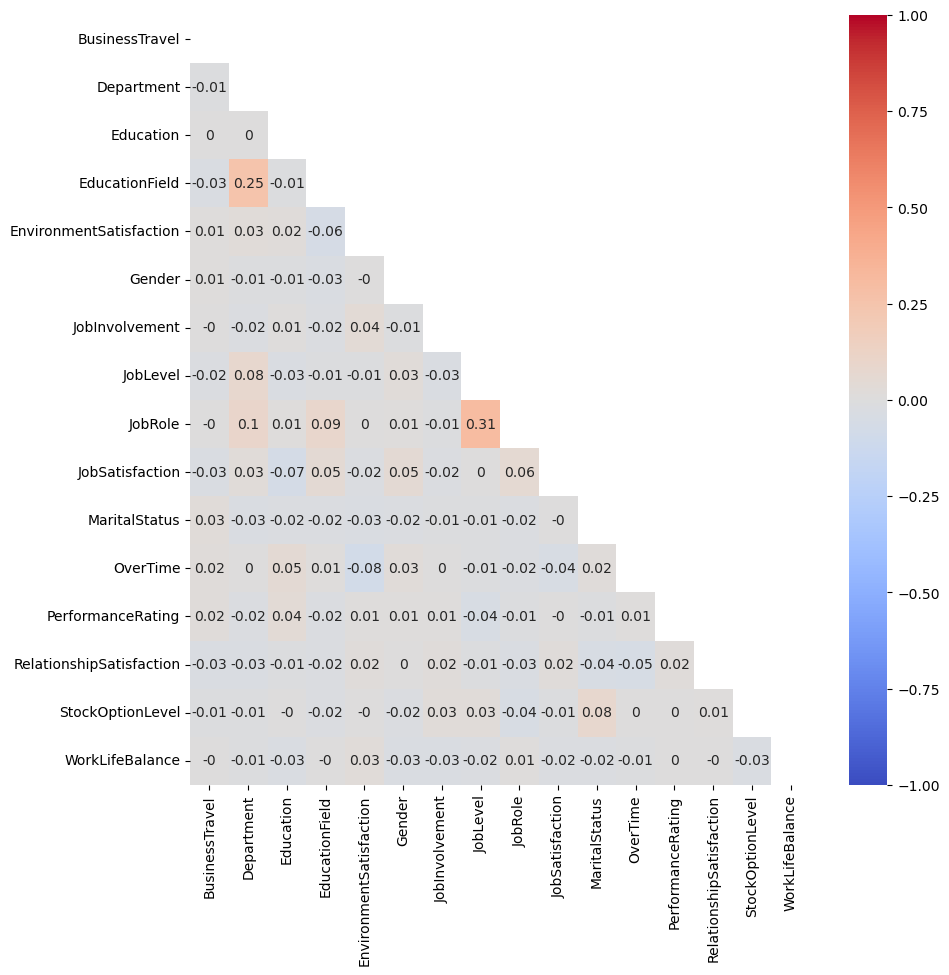

In [65]:
#start correlation analysis, plot with heatmap which facilitates visualization for assessment
corr = X.corr()

mask = np.triu(corr)

plt.figure(figsize=(10,10))
sns.heatmap(corr.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm',mask=mask)

Looking at the correlation matrix heatmap, there aren't any high correlations between any of the independent variables. This tells us that there are no signs of multicollinearity, and our data is in good shape to move forward with fitting into the model. We use Logit from statsmodels to do so.

In [66]:
import statsmodels.api as sm

In [67]:
# adding constant to X variables
X_withconstant = sm.add_constant(X)

In [68]:
# Fitting the model 

# 1. Instantiate model
mylogreg_employees= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_employees_results = mylogreg_employees.fit()

# Look at summary
mylogreg_employees_results.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/Users/mel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning:

overflow encountered in exp

/Users/mel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning:

divide by zero encountered in log

/Users/mel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/mel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1320
Model:                          Logit   Df Residuals:                     1303
Method:                           MLE   Df Model:                           16
Date:                Sat, 04 Feb 2023   Pseudo R-squ.:                     inf
Time:                        16:05:44   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.8798      0.314     -9.163      0.000      -3.496      -2.264
BusinessTravel               0.7286      0.185      3.939      0.000       0.366       1.091
Department                   0.5194      0.148      3.500      0.000       0.229       0.810
Education                   -0.0865      0.072     -1.198      0.231      -0.228       0.055
EducationField               0.0852      0.064      1.330      0.183      -0.040       0.211
EnvironmentSatisfaction      0.3212      0.076      4.227      0.000       0.172       0.470
Gender                      -0.2536      0.169     -1.501      0.133      -0.585       0.078
JobInvolvement               0.2105      0.090      2.338      0.019       0.034       0.387
JobLevel                    -0.6099      0.097     -6.312      0.000      -0.799      -0.420
JobRole                     -0.0259      0.036     -0.711      0.477      -0.097       0.046
JobSatisfaction              0.2253      0.075      2.998      0.003       0.078       0.373
MaritalStatus                0.0908      0.110      0.825      0.409      -0.125       0.306
OverTime                     1.5879      0.171      9.299      0.000       1.253       1.923
PerformanceRating           -0.1752      0.234     -0.750      0.453      -0.633       0.283
RelationshipSatisfaction     0.1432      0.075      1.916      0.055      -0.003       0.290
StockOptionLevel            -0.5060      0.108     -4.682      0.000      -0.718      -0.294
WorkLifeBalance              0.3111      0.086      3.618      0.000       0.143       0.480
============================================================================================
"""

Traditional statistics has chosen p < 0.05 as a cutoff for 'statistical significance'. If our hypothesis test shows that our values have less than a 1/20 chance to have occurred given the null hypothesis, then we reject our null hypothesis.

💡 Some highlights:
- Overtime has the highest correlation with 1.59 and a significant p-value of 0, followed by...
- Business travel at 0.73 with p-value of 0
- Job level at -0.61 with p-value of 0
- Department at 0.52 with p-value of 0 
- Stock option level of -0.51 with p-value of 0
- Work life balance of 0.31 with p-value of 0 
- Environment satisfaction of 0.32 with p-value of 0
- Job satisfaction of 0.23 with p-value of 0.003

The independent variables that have a p-value > 0.05 show that they are not a statistically significant predictor:
- Education with p-value of 0.231 
- Education field with p-value of 0.183
- Gender with p-value of 0.133
- Job role with 0.477
- Marital status with 0.409
- Performance rating with 0.453 
- Relationship satisfaction barely makes it at 0.055

At first glance, overtime and business travel have the biggest influence on predicting attrition. Let's zoom into these factors and take a look at how attrition is distrubted in those areas.

In [69]:
#Distribution of attrition by need to work overtime
employees.groupby('OverTime')['Attrition'].value_counts()

OverTime  Attrition
No        No           944
          Yes          110
Yes       No           289
          Yes          127
Name: Attrition, dtype: int64

In [70]:
#Distribution of attrition by need to travel for work
employees.groupby('BusinessTravel')['Attrition'].value_counts()

BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           12
Travel_Frequently  No           208
                   Yes           69
Travel_Rarely      No           887
                   Yes          156
Name: Attrition, dtype: int64

In [71]:
overtime = employees[employees['OverTime']=='Y']

In [72]:
overtime.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


It's interesting to note that **31% employees who work overtime left**, versus only 10% for those who don't work overtime. 

Additionally, **25% of employees who travel frequently left**, versus 15% for those who travel rarely, and 8% for those who don't travel at all for work.

## 📝 Model Evaluation

Let's see how our model performs before deciding to drop anything.

We evaluate our model by looking at how many data points (in our X data) our model would have predicted correctly.

We need to compare the true attrition with predicted ones. Let's predict using our model.

In [74]:
# Getting probabiistic and binary predictions. Cut off accuracy is set to 50%
model_predictions_prob = mylogreg_employees_results.predict(X_withconstant)
model_predictions_binary = np.where(model_predictions_prob>0.5,1,0)

In [75]:
# Amount that our model predicted right
(model_predictions_binary == employees_clean['Attrition']).sum()

1114

In [76]:
#Length of our dataset
len(employees_clean)

1320

In [77]:
print("The classification accuracy is:", (1114/1320)*100 , "%")

The classification accuracy is: 84.3939393939394 %


Let's drop independent variables with p-values larger than 0.05 (not statistically significant). 

In [78]:
cols_to_drop = ['Education', 'EducationField', 'Gender', 
                'JobRole', 'MaritalStatus', 'PerformanceRating']

In [79]:
# Drop the columns
X.drop(cols_to_drop ,axis=1, inplace=True)

In [80]:
X_withconstant = sm.add_constant(X)

In [81]:
# Fitting the model 

# 1. Instantiate model
mylogreg_employees= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_employees_results = mylogreg_employees.fit()

# Look at summary
mylogreg_employees_results.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/Users/mel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning:

overflow encountered in exp

/Users/mel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning:

divide by zero encountered in log

/Users/mel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/mel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1320
Model:                          Logit   Df Residuals:                     1309
Method:                           MLE   Df Model:                           10
Date:                Sat, 04 Feb 2023   Pseudo R-squ.:                     inf
Time:                        16:06:14   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.9695      0.269    -11.057      0.000      -3.496      -2.443
BusinessTravel               0.7216      0.184      3.924      0.000       0.361       1.082
Department                   0.5442      0.134      4.075      0.000       0.282       0.806
EnvironmentSatisfaction      0.3068      0.075      4.085      0.000       0.160       0.454
JobInvolvement               0.2071      0.090      2.308      0.021       0.031       0.383
JobLevel                    -0.6129      0.095     -6.434      0.000      -0.800      -0.426
JobSatisfaction              0.2296      0.074      3.095      0.002       0.084       0.375
OverTime                     1.5631      0.169      9.262      0.000       1.232       1.894
RelationshipSatisfaction     0.1315      0.074      1.773      0.076      -0.014       0.277
StockOptionLevel            -0.4896      0.107     -4.565      0.000      -0.700      -0.279
WorkLifeBalance              0.3113      0.085      3.655      0.000       0.144       0.478
============================================================================================
"""

In [82]:
# Getting probabiistic and binary predictions. Cut off accuracy is set to 50%
model_predictions_prob = mylogreg_employees_results.predict(X_withconstant)
model_predictions_binary = np.where(model_predictions_prob>0.5,1,0)

In [83]:
# Amount that our model predicted right
(model_predictions_binary == employees_clean['Attrition']).sum()

1114

In [84]:
print("The classification accuracy is:", (1118/1320)*100 , "%")

The classification accuracy is: 84.69696969696969 %


After dropping the columns, the model's classification accuracy improved by a little. 
Looking back at the OLS results, we notice that the p-value of Job Involvement is now bigger than 0.05 at 0.021. Let's drop that, fit, and evaluate again. 

In [85]:
cols_to_drop = ['JobInvolvement']

In [86]:
# Drop the column
X.drop(cols_to_drop ,axis=1, inplace=True)

In [87]:
X_withconstant = sm.add_constant(X)

In [88]:
# Fitting the model 

# 1. Instantiate model
mylogreg_employees= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_employees_results = mylogreg_employees.fit()

# Look at summary
mylogreg_employees_results.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/Users/mel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning:

overflow encountered in exp

/Users/mel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning:

divide by zero encountered in log

/Users/mel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/mel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1320
Model:                          Logit   Df Residuals:                     1310
Method:                           MLE   Df Model:                            9
Date:                Sat, 04 Feb 2023   Pseudo R-squ.:                     inf
Time:                        16:06:14   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.8521      0.263    -10.864      0.000      -3.367      -2.338
BusinessTravel               0.7200      0.183      3.930      0.000       0.361       1.079
Department                   0.5318      0.133      3.985      0.000       0.270       0.793
EnvironmentSatisfaction      0.3197      0.075      4.277      0.000       0.173       0.466
JobLevel                    -0.6129      0.095     -6.459      0.000      -0.799      -0.427
JobSatisfaction              0.2296      0.074      3.103      0.002       0.085       0.375
OverTime                     1.5592      0.168      9.261      0.000       1.229       1.889
RelationshipSatisfaction     0.1386      0.074      1.873      0.061      -0.006       0.284
StockOptionLevel            -0.4846      0.107     -4.517      0.000      -0.695      -0.274
WorkLifeBalance              0.3031      0.085      3.576      0.000       0.137       0.469
============================================================================================
"""

In [89]:
# Getting probabiistic and binary predictions. Cut off accuracy is set to 50%
model_predictions_prob = mylogreg_employees_results.predict(X_withconstant)
model_predictions_binary = np.where(model_predictions_prob>0.5,1,0)

In [90]:
# Amount that our model predicted right
(model_predictions_binary == employees_clean['Attrition']).sum()

1118

In [91]:
print("The classification accuracy is:", (1118/1320)*100 , "%")

The classification accuracy is: 84.69696969696969 %


## 🎲 Odds Ratio

Odds ratio is used to interpret the logistic regression coefficients of the odds ratio of getting class 1, the outcome that the employee left.

In [92]:
mylogreg_employees_results.params

const                      -2.852069
BusinessTravel              0.719975
Department                  0.531792
EnvironmentSatisfaction     0.319744
JobLevel                   -0.612878
JobSatisfaction             0.229645
OverTime                    1.559208
RelationshipSatisfaction    0.138620
StockOptionLevel           -0.484636
WorkLifeBalance             0.303092
dtype: float64

In [93]:
#set my betas
beta0 = mylogreg_employees_results.params[0] #this is the constant
beta1 = mylogreg_employees_results.params[1]
beta2 = mylogreg_employees_results.params[2]
beta3 = mylogreg_employees_results.params[3]
beta4 = mylogreg_employees_results.params[4]
beta5 = mylogreg_employees_results.params[5]
beta6 = mylogreg_employees_results.params[6]
beta7 = mylogreg_employees_results.params[7]
beta8 = mylogreg_employees_results.params[8]
beta9 = mylogreg_employees_results.params[9]

In [94]:
odds = np.exp(beta0)
print(f'The odds of attrition with no factors involved is {odds}.')

The odds of attrition with no factors involved is 0.05772477829884532.


Let's look at business travel and overtime.

In [95]:
#Business travel
odds = np.exp(beta1)
print(f'With one unit increase in business travel, the odds of attrition increases by a factor of {odds}.')

With one unit increase in business travel, the odds of attrition increases by a factor of 2.0543821679525514.


In [96]:
#Overtime
odds = np.exp(beta6)
print(f'With one unit increase in overtime, the odds of attrition increases by a factor of {odds}.')

With one unit increase in overtime, the odds of attrition increases by a factor of 4.7550539919777615.


In [97]:
#Relationship Satisfaction
odds = np.exp(beta7)
print(f'With one unit increase in relationship satisfaction, the odds of attrition increases by a factor of {odds}.')

With one unit increase in relationship satisfaction, the odds of attrition increases by a factor of 1.1486871472706564.


## 🔬 Train Test Split Model

Lastly we want to make sure that our model does not *overfit* to the data it was trained on and can generalize on new data. 

In [98]:
# Remember we defined our X and y
X = employees_clean.drop('Attrition',axis=1)
y = employees_clean['Attrition']

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [100]:
# 1. Instantiate model 
logistic_regression_model = LogisticRegression()

# 2. Fit model on the training data
logistic_regression_model.fit(X_train, y_train)

# 3. Score on the training data 
train_score = logistic_regression_model.score(X_train, y_train)

# 4. Score on the testing data
test_score = logistic_regression_model.score(X_test, y_test)

print('Training our model with 75% of the data, we get:')
print('Train score:')
print(train_score)
print('Test score:')
print(test_score)

Training our model with 75% of the data, we get:
Train score:
0.8454545454545455
Test score:
0.8515151515151516


The results above show that both the training score and test score are very similar, showing that it is a good model that is not overfitting or underfitting the data. 

## 💡 Summary and Recommendations

It is important to identify the most likely reasons why employees leave the organization as these findings can help the organization take action and reduce the level of attrition.

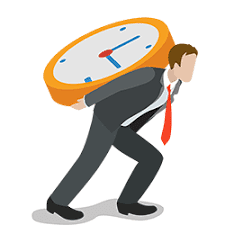

Based on the categorical data, we found that **the biggest factor to employee attrition was working overtime.** This was followed by frequency of business travel, job level, department, stock option level, environment satisfaction, and work life balance. We also found from plotting the variables with numerical data that attrition was higher in the younger age bracket (highest at around 30 years old) and starts to flatten off after that. It was also clear that salary affected attrition in that employees with lower income and lower salary hike percents left more versus those with higher salary numbers. This is unsurprising as the employees likely left to seek higher salary opportunities.

The following are possible recommendations to the company to reduce attrition:
- ⏰ **Reduce the need for overtime work.** This may involve some organizational restructuring work, a review on how realistic deadlines to meet goals are, a review on whether or not employees need more support, tools, and resources to do their work, an investment on technology to increase productivity, efficiency, and output, and more.


- ✈️ **Increase easement of business travel.** This may involve creating capacity within the company that can handle all business travel arrangements to take that workload off the employee (ex. hiring an admin assistant, or create capacity in the HR department), rewarding your employee through vouchers, packages, or gift cards they can use on their trip, and more.


- 🗂 **Diversify stock option levels.** Offering more stock options may motivate employees to stay and create a stronger loyalty to the company.


- 🧘 **Encourage work life balance.** Encouraging work life balance can be achieved by reviewing the current benefits package and identifying areas where it can be improved, offering remote work options so employees get to work from home, reducing long hours of work, changing the work culture, and more. 